In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Libraries**

In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import os
base_dir = '/content/gdrive/MyDrive/Chestxray'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
train_norm_dir = os.path.join(train_dir,'NORMAL')
train_pnum_dir = os.path.join(train_dir,'PNEUMONIA')
test_norm_dir = os.path.join(test_dir,'NORMAL')
test_pnum_dir = os.path.join(test_dir,'PNEUMONIA')

In [ ]:
import os
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [ ]:
new = '/content/gdrive/MyDrive/Chestxray'

**Train Dataset**

In [ ]:
train_list = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+'/'+label):
        train_list.append(train_dir+label+'/'+image)
        train_labels.append(label)

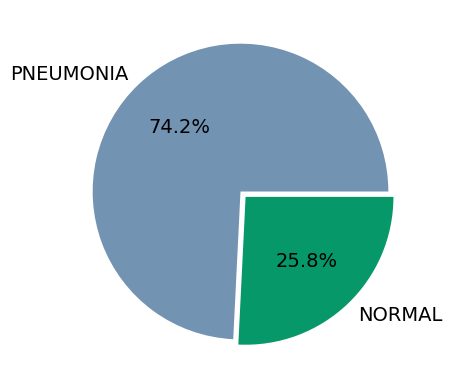

In [ ]:
colors = ['#7393B3', '#069869']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='PNEUMONIA']),
         len([x for x in train_labels if x=='NORMAL'])],
        labels=['PNEUMONIA', 'NORMAL'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

**Test Dataset**

In [ ]:
test_list = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+'/'+label):
        test_list.append(test_dir+label+'/'+image)
        test_labels.append(label)

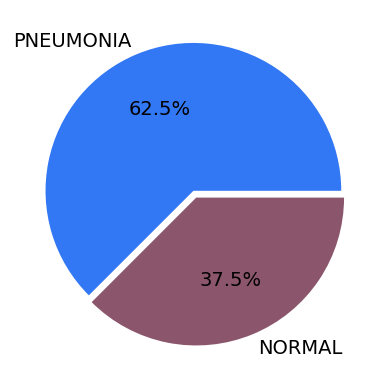

In [ ]:
colors = ['#3277f4', '#8b566c']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in test_labels if x=='PNEUMONIA']),
         len([x for x in test_labels if x=='NORMAL'])],
        labels=['PNEUMONIA', 'NORMAL'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

In [ ]:
train_pnum_names = os.listdir(train_pnum_dir)
print(train_pnum_names[:10])

train_norm_names = os.listdir(train_norm_dir)
print(train_norm_names[:10])

test_pnum_names = os.listdir(test_pnum_dir)
print(test_pnum_names[:10])

test_norm_names = os.listdir(test_norm_dir)
print(test_norm_names[:10])

['person1465_virus_2532.jpeg', 'person691_bacteria_2588.jpeg', 'person1877_bacteria_4761.jpeg', 'person577_bacteria_2378.jpeg', 'person62_bacteria_302.jpeg', 'person989_virus_1667.jpeg', 'person554_bacteria_2322.jpeg', 'person687_bacteria_2583.jpeg', 'person258_bacteria_1206.jpeg', 'person23_bacteria_100.jpeg']
['NORMAL2-IM-1333-0001.jpeg', 'NORMAL2-IM-1043-0001.jpeg', 'NORMAL2-IM-0948-0001.jpeg', 'NORMAL2-IM-0981-0001.jpeg', 'IM-0742-0001.jpeg', 'IM-0432-0001.jpeg', 'NORMAL2-IM-1275-0001.jpeg', 'NORMAL2-IM-1105-0001.jpeg', 'IM-0268-0001.jpeg', 'NORMAL2-IM-0874-0001.jpeg']
['person85_bacteria_422.jpeg', 'person1647_virus_2848.jpeg', 'person1669_virus_2884.jpeg', 'person122_bacteria_582.jpeg', 'person119_bacteria_565.jpeg', 'person147_bacteria_706.jpeg', 'person36_virus_81.jpeg', 'person89_bacteria_440.jpeg', 'person124_bacteria_589.jpeg', 'person39_virus_85.jpeg']
['IM-0025-0001.jpeg', 'IM-0031-0001.jpeg', 'NORMAL2-IM-0315-0001.jpeg', 'NORMAL2-IM-0123-0001.jpeg', 'NORMAL2-IM-0301-0001.

In [ ]:
print("train dataset pneumonia images:",len(train_pnum_names))
print("train dataset normal images:",len(train_norm_names))
print("test dataset pneumonia images:",len(test_pnum_names))
print("test dataset normal images:",len(test_norm_names))

print("total train images:",len(train_pnum_names+train_norm_names))
print("total test images:",len(test_pnum_names+test_norm_names))

train dataset pneumonia images: 3883
train dataset normal images: 1349
test dataset pneumonia images: 390
test dataset normal images: 234
total train images: 5232
total test images: 624


**Visualizing Images**

In [ ]:
def plot_image(new, title):
    image_filenames = os.listdir(new)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(new + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

(1456, 1364)
(1612, 1804)
(1839, 1994)
(1137, 1418)


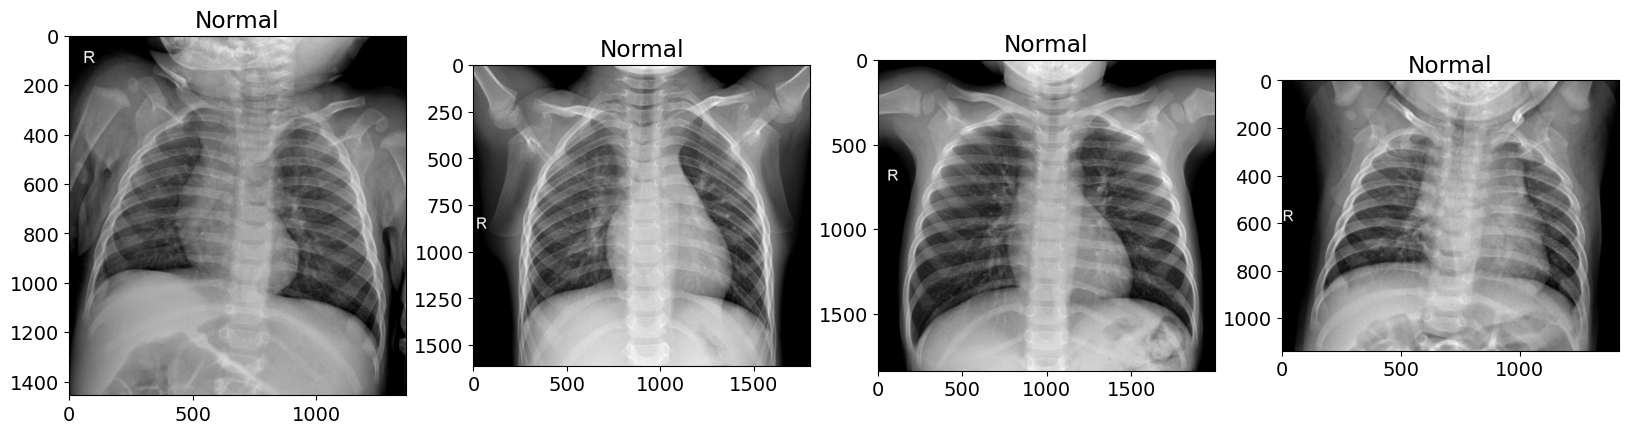

In [ ]:
image_folder_path = train_dir + '/NORMAL'
plot_image(image_folder_path, "Normal")

(920, 1152)
(552, 920)
(1096, 1544)
(929, 1508)


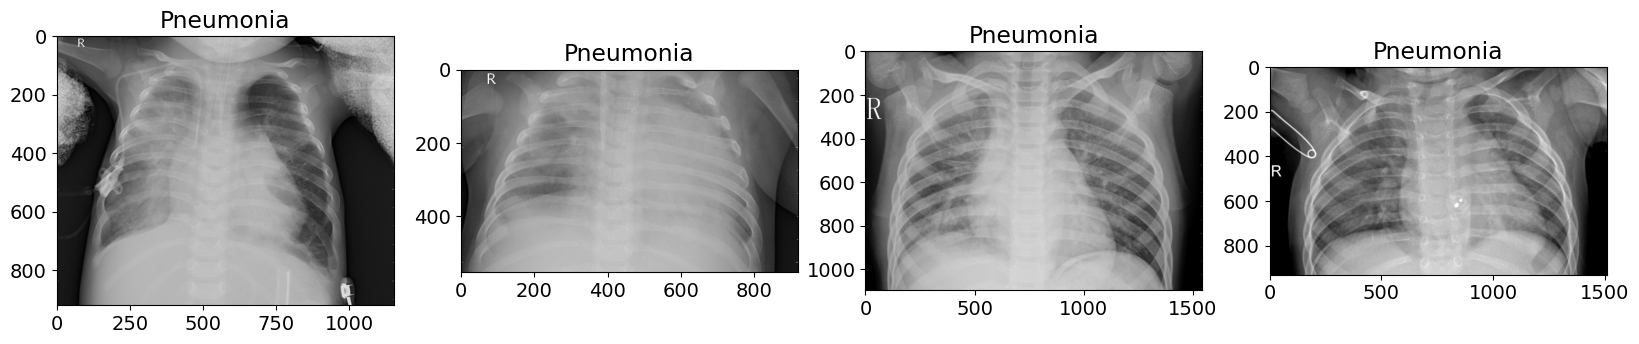

In [ ]:
image_folder_path = train_dir + '/PNEUMONIA'
plot_image(image_folder_path, "Pneumonia")

**Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,shuffle=True,
                                                    class_mode='binary')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                subset='validation',
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=False,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='binary')


Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


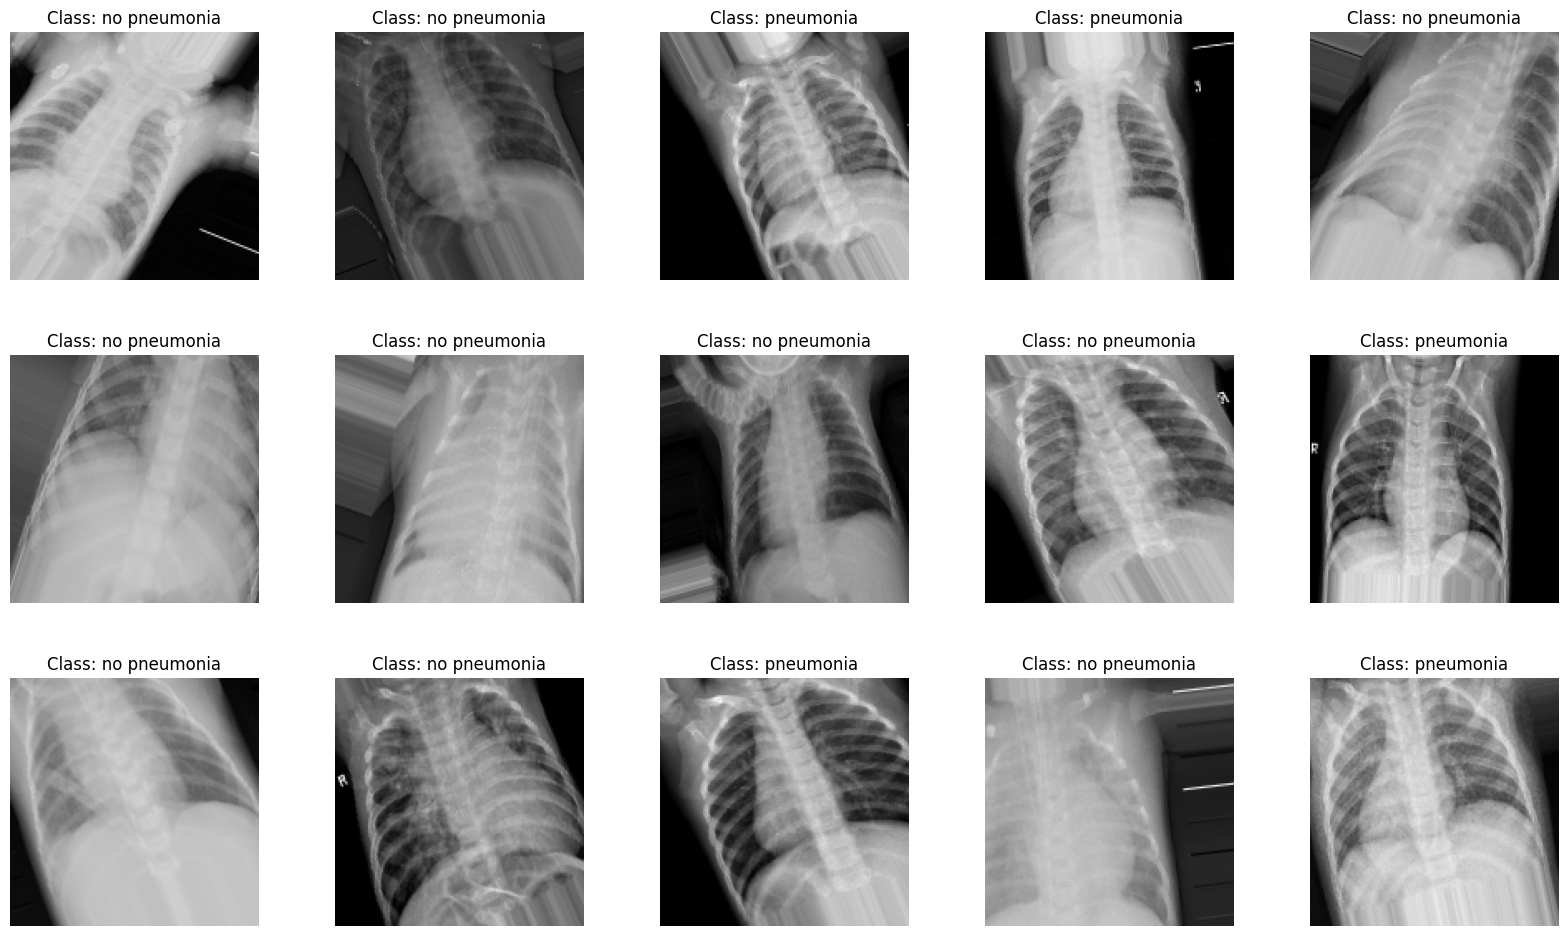

In [ ]:
labels = ['pneumonia', 'no pneumonia']


samples = train_generator.__next__() #n"ext fetches the image from the object. everytime u run it it gives a new set of images in train set

images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')
    

**CNN model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D

In [ ]:
model = Sequential()

#convolutional neural networks - CNNs
model.add(Conv2D(32, (3,3), padding='SAME',activation = "relu",input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3),padding = 'SAME', activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3),padding = 'SAME', activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3,3),padding = 'SAME', activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

**Class Weights**

In [ ]:
TRAIN_IMG_COUNT = len(os.listdir(train_norm_dir)) + len(os.listdir(train_pnum_dir))
COUNT_NORMAL = len(os.listdir(train_norm_dir))
COUNT_PNEUMONIA = len(os.listdir(train_pnum_dir))

weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_NORMAL)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_PNEUMONIA)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
(weight_for_0)

1.939214232765011

In [ ]:
weight_for_1

0.6737058975019315

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = val_generator,
                    class_weight = class_weight
                    )

Epoch 1/30
131/131 [==============================] - 1139s 9s/step - loss: 0.7537 - accuracy: 0.3797 - val_loss: 0.6938 - val_accuracy: 0.2574
Epoch 2/30
131/131 [==============================] - 96s 732ms/step - loss: 0.6932 - accuracy: 0.3740 - val_loss: 0.6914 - val_accuracy: 0.7426
Epoch 3/30
131/131 [==============================] - 95s 720ms/step - loss: 0.6911 - accuracy: 0.5233 - val_loss: 0.6865 - val_accuracy: 0.7426
Epoch 4/30
131/131 [==============================] - 94s 719ms/step - loss: 0.6824 - accuracy: 0.5945 - val_loss: 0.6832 - val_accuracy: 0.7426
Epoch 5/30
131/131 [==============================] - 95s 727ms/step - loss: 0.6534 - accuracy: 0.6570 - val_loss: 0.5971 - val_accuracy: 0.7426
Epoch 6/30
131/131 [==============================] - 93s 711ms/step - loss: 0.5233 - accuracy: 0.7349 - val_loss: 0.5295 - val_accuracy: 0.7215
Epoch 7/30
131/131 [==============================] - 96s 729ms/step - loss: 0.4711 - accuracy: 0.7471 - val_loss: 0.5412 - val_acc

Text(0.5, 0, 'epoch')

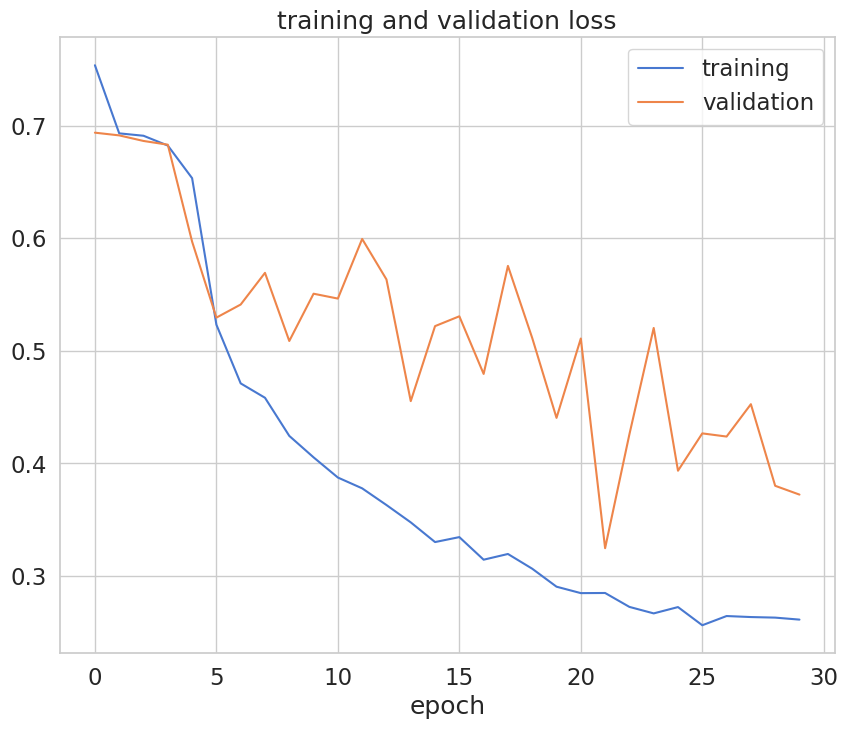

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

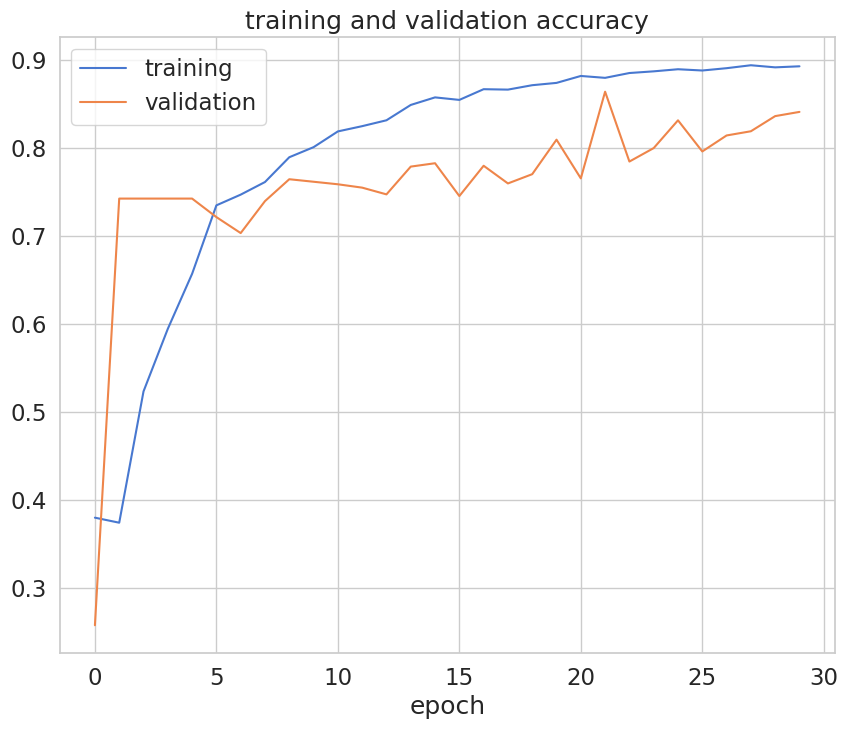

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

20/20 [==============================] - 127s 7s/step - loss: 0.5620 - accuracy: 0.7516
test acc :0.7516025900840759 test loss:0.5620213747024536


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_generator)
y_pred = y_pred.round()
y_true = test_generator.classes
print(classification_report(y_true,y_pred))

20/20 [==============================] - 7s 342ms/step
              precision    recall  f1-score   support

           0       0.90      0.38      0.53       234
           1       0.72      0.97      0.83       390

    accuracy                           0.75       624
   macro avg       0.81      0.68      0.68       624
weighted avg       0.79      0.75      0.72       624



In [ ]:
test_labels = test_generator.classes

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_generator)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

20/20 [==============================] - 6s 283ms/step
CONFUSION MATRIX ------------------
[[ 89 145]
 [ 10 380]]

TEST METRICS ----------------------
Accuracy: 75.16025641025641%
Precision: 72.38095238095238%
Recall: 97.43589743589743%
F1-score: 83.06010928961747

TRAIN METRIC ----------------------
Train acc: 89.3


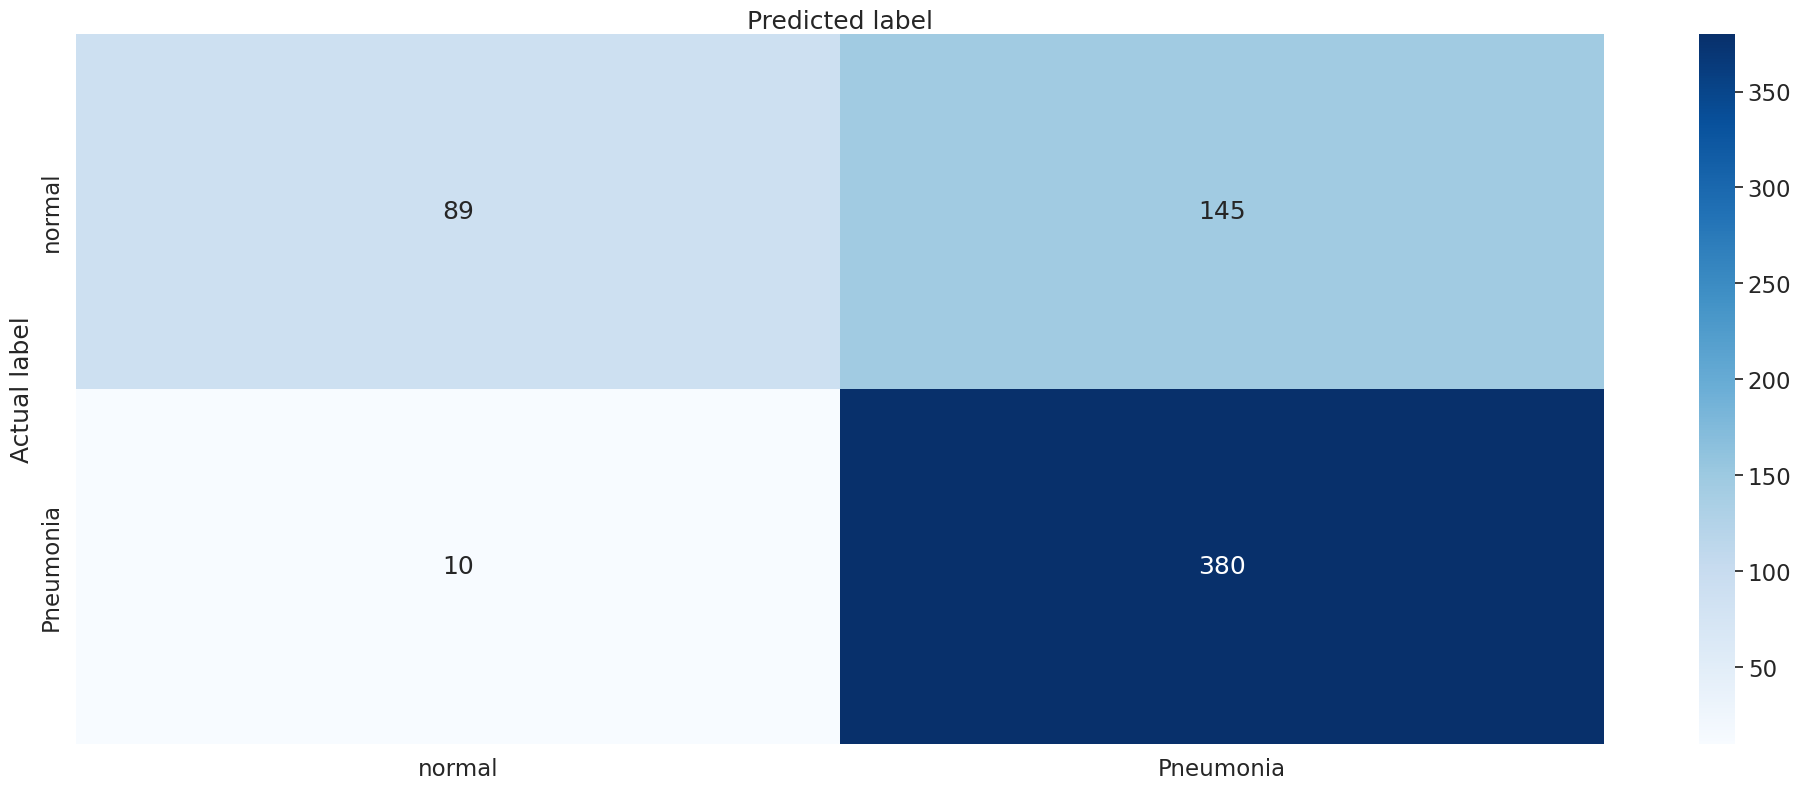

In [ ]:
import pandas as pd 
import seaborn as sns
class_names = ["normal","Pneumonia"]

fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

df_cm = pd.DataFrame(cm, index=class_names, columns=class_names, )
sns.heatmap(df_cm,annot=True,cmap="Blues",fmt="d")
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/Saved/ACC_Pneumonia.h5')

In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Saved/ACC_Pneumonia.h5')

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Saved/ACC_Pneumonia.h5')

# Load the image you want to classify
img_path = '/content/gdrive/MyDrive/Chestxray/test/NORMAL/NORMAL2-IM-0098-0001.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make the prediction
result = model.predict(x)

# Interpret the prediction
if result[0][0] < 0.5:
    prediction = "NORMAL"
else:
    prediction = "PNEUMONIA"

print(prediction)

1/1 [==============================] - 0s 80ms/step
NORMAL


In [ ]:
for filename, prediction in zip(test_generator.filenames, Predections):
    print("Image file:", filename)
    print("Prediction:", prediction)
    # Add code to display or process the image as desired
    print()


Image file: NORMAL/IM-0001-0001.jpeg
Prediction: [0.89186704]

Image file: NORMAL/IM-0003-0001.jpeg
Prediction: [0.98003733]

Image file: NORMAL/IM-0005-0001.jpeg
Prediction: [0.86173546]

Image file: NORMAL/IM-0006-0001.jpeg
Prediction: [0.7446388]

Image file: NORMAL/IM-0007-0001.jpeg
Prediction: [0.7738857]

Image file: NORMAL/IM-0009-0001.jpeg
Prediction: [0.9151446]

Image file: NORMAL/IM-0010-0001.jpeg
Prediction: [0.9336766]

Image file: NORMAL/IM-0011-0001-0001.jpeg
Prediction: [0.71549255]

Image file: NORMAL/IM-0011-0001-0002.jpeg
Prediction: [0.89911836]

Image file: NORMAL/IM-0011-0001.jpeg
Prediction: [0.7573274]

Image file: NORMAL/IM-0013-0001.jpeg
Prediction: [0.79717153]

Image file: NORMAL/IM-0015-0001.jpeg
Prediction: [0.86201245]

Image file: NORMAL/IM-0016-0001.jpeg
Prediction: [0.945991]

Image file: NORMAL/IM-0017-0001.jpeg
Prediction: [0.82605433]

Image file: NORMAL/IM-0019-0001.jpeg
Prediction: [0.8721523]

Image file: NORMAL/IM-0021-0001.jpeg
Prediction: [0.6